In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
working_dir = os.getcwd()
data_dir = working_dir + '/Data/'

In [3]:
traindata = pd.read_csv(data_dir + 'TrainData.csv')
forecast_input = pd.read_csv(data_dir + "WeatherForecastInput.csv").filter(['WS10'])
solution = pd.read_csv(data_dir + "Solution.csv")

traindata = traindata.drop(['U100', 'V100', 'WS100'], axis=1)

In [4]:
X = traindata.filter(['WS10'])
y = traindata['POWER']


In [5]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [6]:
prediction = lr.predict(forecast_input)

In [7]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.12259336]
lr.intercept_: -0.08367458093320651


In [8]:
print("Training set score lr: {:.2f}".format(lr.score(X, y)))
print("Prediction set score lr: {:.2f}".format(lr.score(forecast_input, solution.filter(['POWER'], axis=1))))

Training set score lr: 0.53
Prediction set score lr: 0.45


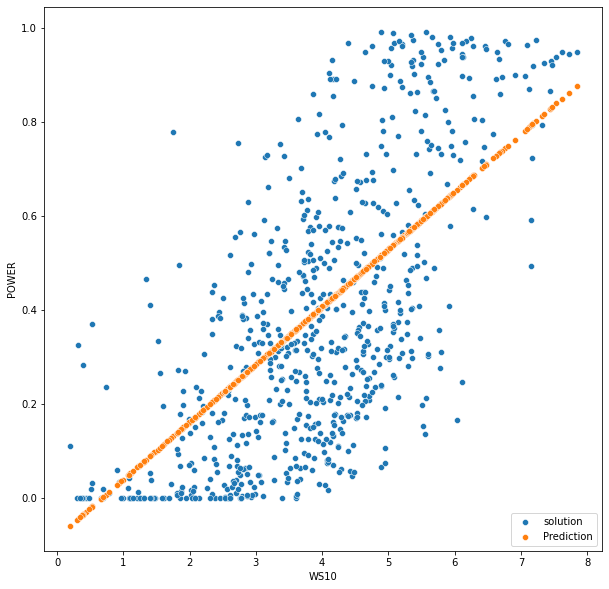

In [9]:
fig, axs = plt.subplots(figsize=(10, 10))

sns.scatterplot(ax=axs, x=forecast_input['WS10'], y=solution['POWER'], label='solution')
sns.scatterplot(ax=axs, x=forecast_input['WS10'], y=prediction, label='Prediction')

plt.legend(loc='lower right')

In [10]:
from sklearn import metrics

lr_rmse = np.sqrt(metrics.mean_squared_error(solution['POWER'], prediction))
lr_rmse

0.21638408562354403

Text(0.5, 1.0, 'Multi Linear Regression')

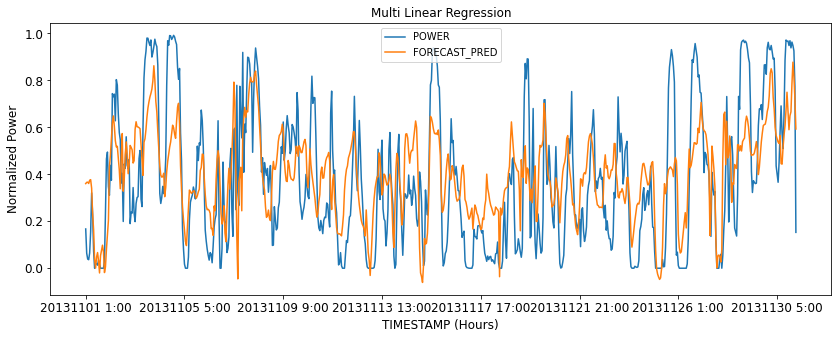

In [11]:
solutionLR = pd.read_csv(data_dir + "Solution.csv")
solvedLR = solutionLR.drop(['POWER'], axis=1)
solvedLR["FORECAST"] = prediction
solvedLR.to_csv(data_dir+"ForecastTemplate1-LR.csv")

solutionLR = solutionLR.set_index('TIMESTAMP')
solvedPlotLR = solutionLR
solvedPlotLR["FORECAST_PRED"] = prediction
ax1=solvedPlotLR.plot(figsize=(14,5), fontsize =12)
ax1.set_xlabel("TIMESTAMP (Hours)",fontdict={'fontsize':12})
ax1.set_ylabel("Normalized Power",fontdict={'fontsize':12})
ax1.set_title("Multi Linear Regression",fontdict={'fontsize':12})